In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv files

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print('Train:\n',df_train.head())
print('Test:\n',df_test.head())

Train:
   image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
Test:
   image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4


In [3]:
print('Train:\n',len(df_train))
print('Test:\n',len(df_test))

Train:
 1821
Test:
 1821


## We reject testing data because there are no labels assigned to photos so whole dataset consists of 1821 photos

In [4]:
print('Labels:',list(df_train.columns[1:]))

Labels: ['healthy', 'multiple_diseases', 'rust', 'scab']


In [5]:
df = df_train[list(df_train.columns[1:])]
df.sum()

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

<Axes: >

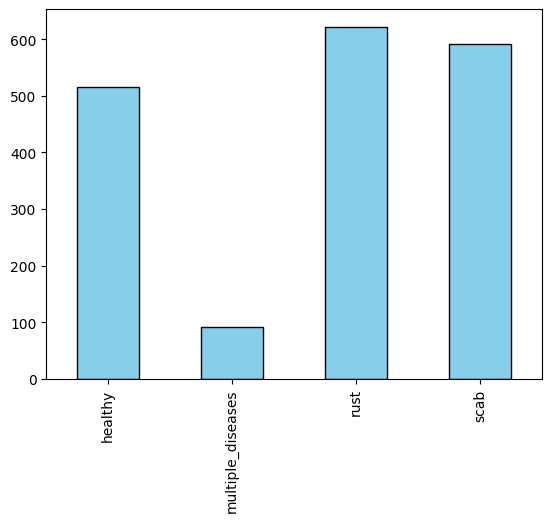

In [6]:
df.sum().plot(kind='bar', color='skyblue', edgecolor='black')

In [7]:
df['class'] = df.apply(lambda row: row.idxmax(), axis=1).astype('category').cat.codes
df['image_id'] = df_train['image_id']
df

,healthy,multiple_diseases,rust,scab,class,image_id
0,0,0,0,1,3,Train_0
1,0,1,0,0,1,Train_1
2,1,0,0,0,0,Train_2
3,0,0,1,0,2,Train_3
4,1,0,0,0,0,Train_4
...,...,...,...,...,...,...
1816,0,0,0,1,3,Train_1816
1817,1,0,0,0,0,Train_1817
1818,1,0,0,0,0,Train_1818
1819,0,0,1,0,2,Train_1819


* Classes and indexes
  + Healthy - 0 
  + multiple_deseases - 1
  + rust - 2
  + scap - 3

# Displaying some photos of different classes

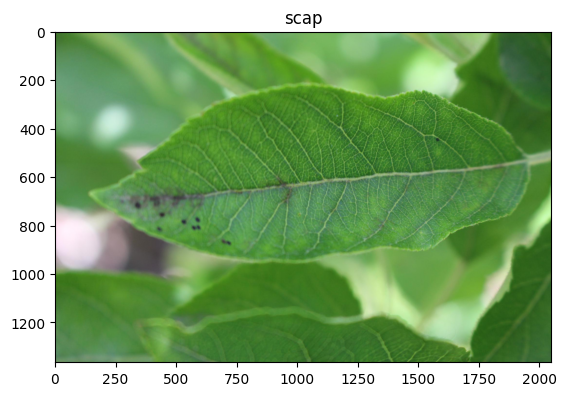

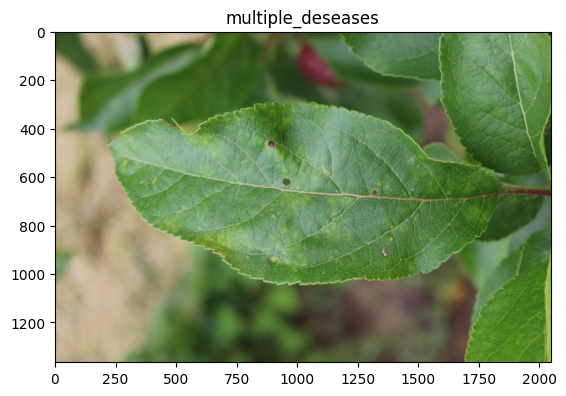

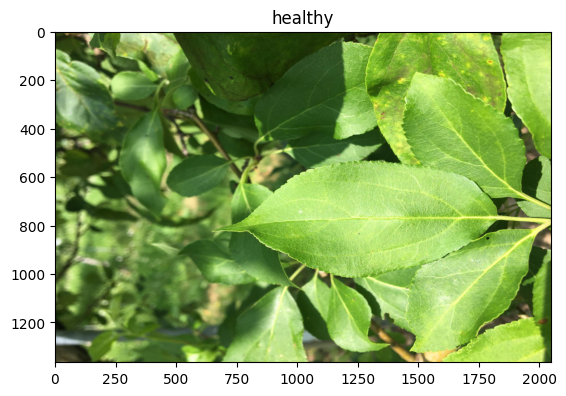

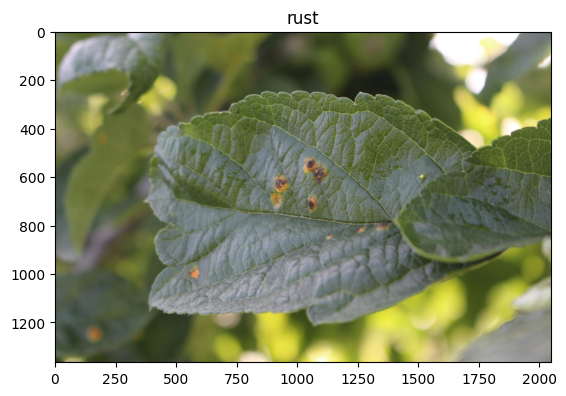

In [35]:
categories = {
    0: 'healthy', 
    1: 'multiple_deseases', 
    2: 'rust', 
    3: 'scap'
}
for category in df['class'].unique():
    random_photo_index = df[df['class'] == category].sample(1).index[0]
    plt.imshow(plt.imread(f"images/{df['image_id'].loc[random_photo_index]}.jpg"))
    plt.title(categories[category])
    plt.show()

# checking images' size

In [38]:
size = []
for image in df['image_id']:
    im = plt.imread(f'images/{image}.jpg')
    size.append(im.shape)


In [39]:
size = np.unique(size)
print(size)

[   3 1365 2048]


### All images are in size 1365x2048x3
#### So resize to 250x250